# <h1 style='background:#FA8572; border:2; border-radius: 10px; font-size:250%; font-weight: bold; color:black'><center>WINE QUALITY ANALYSIS</center></h1> 
 
<center><img src = "https://ugc.futurelearn.com/uploads/images/d4/21/header_d4211985-2f23-4695-a8bb-dfe09ed15e3a.jpg" width = 900 height = 400/></center>

In today's day and age predicting the wine quality is really difficult for customers at supermarket, restaurants and for even supermarket chains. Due to decorative packaging and mostly exact same packaging as quality bottles. It is extremely difficult to detect a forgery since there are no unique adequate verification procedures. Using detailed analysis I am able to derive some techniques which will be used to predict good quality wine.

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Objectives

### 1.   **Conduct an initial exploratory analysis  of the dataset**
### 2.   **Does the data include any distinct groups of wines**
### 3.   **Build a model to predict the quality score that a new wine will receive.**
### 4.   **What are the  advantages and drawbacks of the method that you have chosen?**





# EDA

## Data Manipulation

Install DataPrep Library and restart the kernel

In [11]:
!pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing all the required libraries


*   For ML Models: sklearn, xgboost
*   For Data Processing: numpy, pandas, sklearn
*   For Data Visualization: matplotlib, seaborn, plotly, scipy, missingno





In [12]:
# For ML models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

#For Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# For EDA
from dataprep.eda import create_report

# For Data Processing
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 

# For Balancing Class
from imblearn.over_sampling import SMOTE

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib as mpl
%matplotlib inline
import scipy.stats as st
import missingno as msno

# Miscellaneous
import os
import random
import warnings
warnings.filterwarnings("ignore")

In [13]:
pd.set_option("display.max_rows", 20, "display.max_columns", 20)

#### **Importing the Dataset**

In [14]:
df = pd.read_csv("/content/WineQT.csv")

#### **Dataset View**

In [15]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


**Setting the ID columns as Index**

In [16]:
df=df.set_index('Id')

#### Dataset Information

We can see that all of the data types are floats except for 'quality,' which is an integer.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143 entries, 0 to 1597
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 116.1 KB


## Description of Features of Dataset

 1.   **Fixed acidity** - Tartaric, malic, citric, and succinic acids are the most common fixed acids found in wine. Their amounts in wine might vary significantly.
 2.   **Volatile acidity** - The volatile acidity of a wine is a measure of its volatile (or gaseous) acids. Acetic acid is the principal volatile acid in wine, and it is also the primary acid linked with the smell and flavour of vinegar.   
 3.   **Citric acid** - It is frequently added to wines to boost acidity, compliment a particular taste, or avoid ferric hazes. It can be added to finished wines to boost acidity and give them a "fresh" taste. The downside of using citric acid is that it is microbially unstable.          
 4.   **Residual sugar** - It is made from naturally occurring grape sugars that are left over in wine after the alcoholic fermentation process. Grams per litre are used to measure it. Accordingly, a wine with 10 grammes of residual sugar per litre, for instance, has 1% sweetness or 1.8 grammes of total carbs per serving (5 ounces/150 ml).       
 5.   **Chlorides** - It makes a considerable contribution to the sensory qualities of the wine, influencing its colour, clarity, taste, and scent. These minerals' concentrations will be mainly influenced by the soil, climate, variety, rootstock and fertilising practises in the wine-growing region.            
 6.   **Free sulfur dioxide** - The sulfites that are free and ready to react have antimicrobial and antioxidant effects.  
 7.   **Total sulfur dioxide** - Total levels of SO2. 
 8.   **Density** - Winemakers often gauge the density or specific gravity (SG) over time to create a fermentation curve, which provides information about the circumstances during fermentation and their favorableness for yeast development.              
 9.   **pH** - In chemistry, the pH scale is used to define the acidity or basicity of an aqueous solution. Historically, pH stood for "potential of hydrogen." Lower pH values are measured for acidic liquids.                    
 10.  **Sulphates** - Sulphites act as both a wine's preservative and enhancer            
 11.  **Alcohol** - The alcoholic strength of all wines - whether red, white, rosé or sparkling (like prosecco or champagne) – can vary a lot. They are typically around 11-14% ABV, although some can be as high as 14.5% ABV               
 12.  **Quality** - The vinification technique and the grapes' geographic origin determine the quality of the wine. 



#### **Brief Information of different descriptive statistics**-

* Measures of Frequency :- Count, Percent, Frequency.
* Measures of Central Tendency :- Mean, Median, and Mode.
* Measures of Dispersion or Variation:- Range(min,max),Variance, Standard Deviation.
* Measures of Position :- Percentile Ranks, Quartile Ranks.

In [18]:
df.describe()[1:].T.style.background_gradient(cmap='Blues')

,mean,std,min,25%,50%,75%,max
fixed acidity,8.311111,1.747595,4.600000,7.100000,7.900000,9.100000,15.900000
volatile acidity,0.531339,0.179633,0.120000,0.392500,0.520000,0.640000,1.580000
citric acid,0.268364,0.196686,0.000000,0.090000,0.250000,0.420000,1.000000
residual sugar,2.532152,1.355917,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,0.086933,0.047267,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,15.615486,10.250486,1.000000,7.000000,13.000000,21.000000,68.000000
total sulfur dioxide,45.914698,32.782130,6.000000,21.000000,37.000000,61.000000,289.000000
density,0.996730,0.001925,0.990070,0.995570,0.996680,0.997845,1.003690
pH,3.311015,0.156664,2.740000,3.205000,3.310000,3.400000,4.010000
sulphates,0.657708,0.170399,0.330000,0.550000,0.620000,0.730000,2.000000


In [19]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [20]:
df.nunique().sort_values(ascending=True)

quality                   6
free sulfur dioxide      53
alcohol                  61
citric acid              77
residual sugar           80
pH                       87
sulphates                89
fixed acidity            91
chlorides               131
volatile acidity        135
total sulfur dioxide    138
density                 388
dtype: int64

**Here, we're testing to see if our dataset contains any duplicate rows. Only rows when the complete row matches will be deemed duplicates.
Below is a list of the 125 duplicate rows we discovered.**

In [21]:
df[df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol', 'quality']].duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
91,8.6,0.490,0.28,1.90,0.110,20.0,136.0,0.99720,2.93,1.95,9.9,6
93,7.7,0.490,0.26,1.90,0.062,9.0,31.0,0.99660,3.39,0.64,9.6,5
102,8.1,0.545,0.18,1.90,0.080,13.0,35.0,0.99720,3.30,0.59,9.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1507,7.5,0.380,0.57,2.30,0.106,5.0,12.0,0.99605,3.36,0.55,11.4,6
1560,7.8,0.600,0.26,2.00,0.080,31.0,131.0,0.99622,3.21,0.52,9.9,5
1561,7.8,0.600,0.26,2.00,0.080,31.0,131.0,0.99622,3.21,0.52,9.9,5


**We are removing the duplicates from our datset so that we have clean dataset and our analysis and prediction will be more accurate.
And now we are left with 1018 rows which are unique combinations of feature variables**

In [22]:
df = df.drop_duplicates()
df.shape


(1018, 12)

## Data Visualization

**As we can see from our below graph there are no missing values in our updated dataset which has 1018 rows and 12 columns**

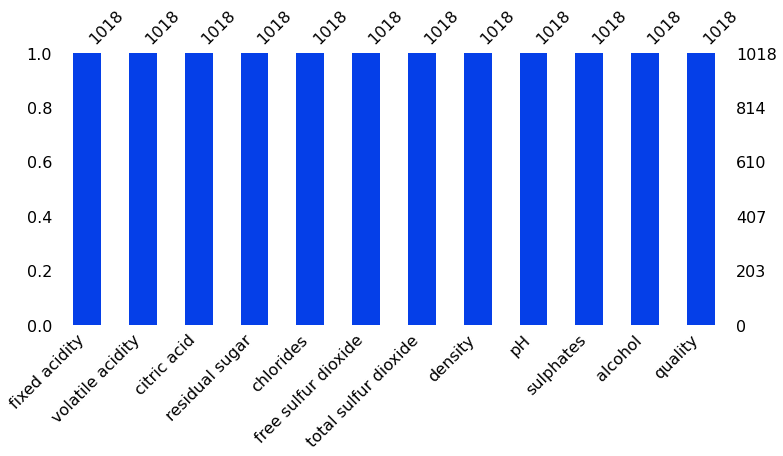

In [23]:
msno.bar(df, figsize = (12,5),color = "#053fe8")
plt.show()

#### **Correlation Matrix**

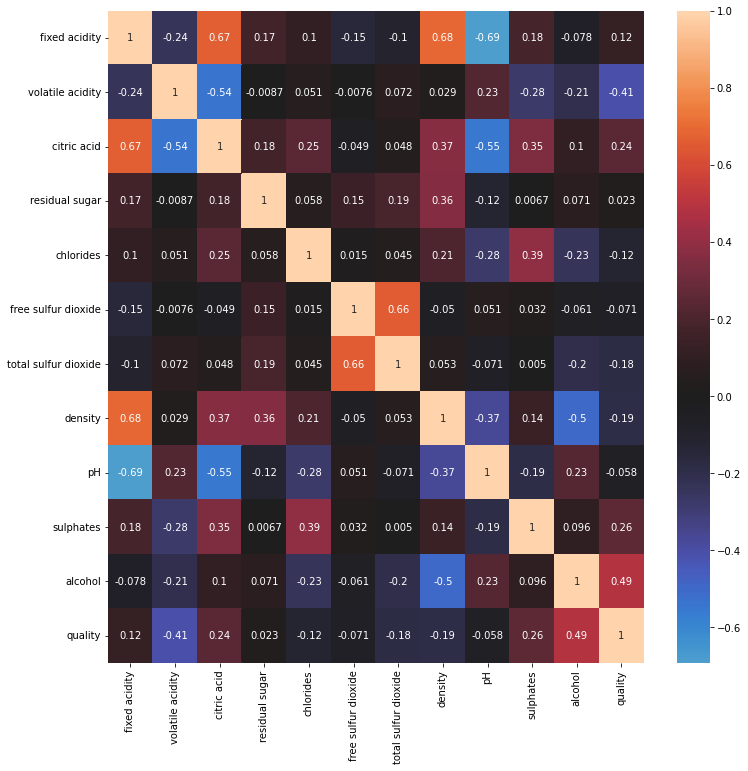

In [24]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,center = 0)
plt.show()

* Variables with correlation with target variable **quality** are:
  1. **Volatile acidity** is moderately correlated with value of **-0.41**.
  2. **Alchohol** is moderately correlated with value of **0.49**.
  3. **Citric acid** slightly correlated with value of **0.24**.
  4. **Sulphates** is slightly correlated with value of **0.26**.
* Fixed acidity is higly correlated with citric acid and density.
* Free sulphur dioxide is also highly correated with total sulphur dioxide and vice-versa which is given as it a constituent of sulphur di oxide.

#### Interaction of variables with each other

Relative Plot Of Some Selected Features: A Data Subset


<Figure size 432x288 with 0 Axes>

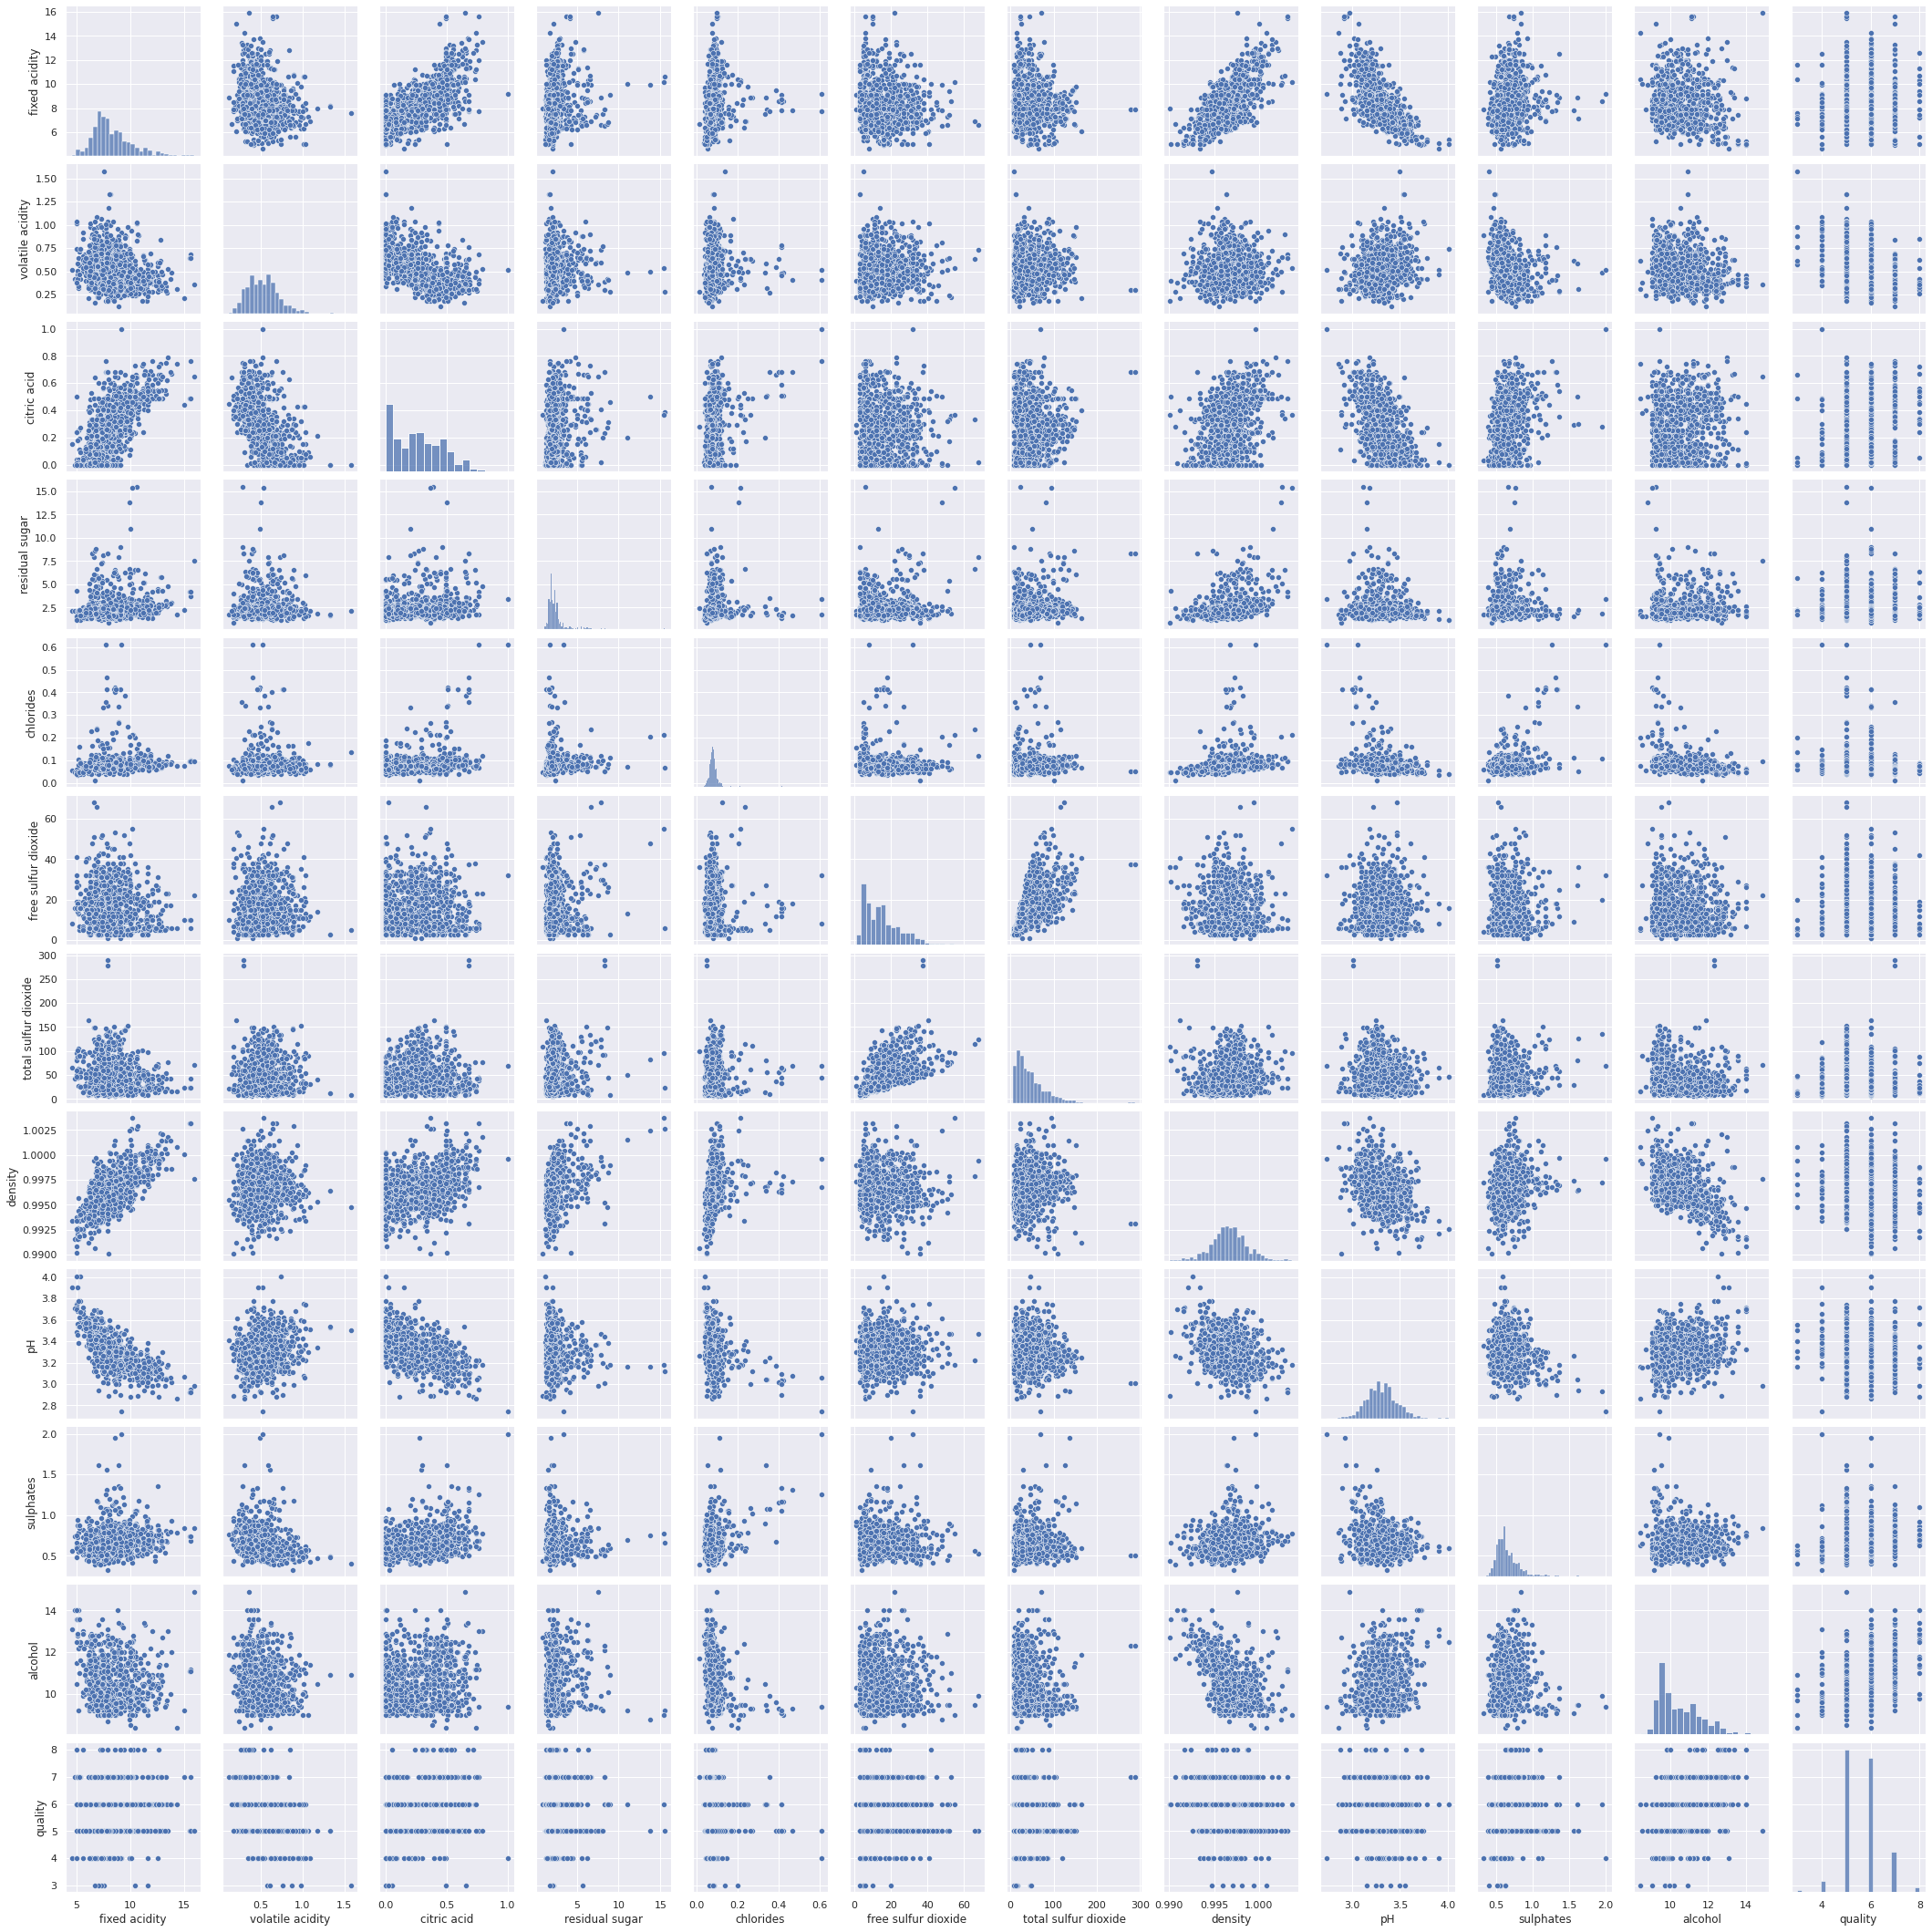

In [25]:
from matplotlib import colors
sns.set()
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
print("Relative Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[df.columns])
plt.show()

#### **Insights from above plot**
* The above plot demonstrates that lower volatile acidity values correspond to higher quality values.
* It appears that higher levels of free sulphur dioxide correspond to higher levels of total sulphur dioxide.
* A better quality typically translates into low levels of free sulphur dioxide and total sulphur dioxide.
* It appears that higher fixed acidity levels correspond to higher densities
* The above plot demonstrates that wines with higher sulphate levels are typically of higher quality.
* It appears that citric acid and volatile acidity are inversely related; that is, high citric acid values correspond to low volatile acidity values.
* As demonstrated by the volatile acidity-quality Boxplot previously, low levels of volatile acidity are typically associated with higher quality.
* As seen from the image above, wines with higher alcohol content typically have higher quality ratings.

**Below are the feature values by mean according to the quality of Wine**

In [26]:
winefeatures = df.groupby("quality").mean()
winefeatures

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.450000,0.897500,0.211667,2.666667,0.105333,8.166667,24.500000,0.997682,3.361667,0.550000,9.691667
4,7.809091,0.700000,0.165758,2.566667,0.094788,14.848485,40.606061,0.996669,3.391212,0.637879,10.260606
5,8.134642,0.587436,0.239307,2.527252,0.091880,16.766744,56.001155,0.997041,3.304088,0.614573,9.912702
6,8.328117,0.504731,0.269633,2.444010,0.085687,15.221271,40.097800,0.996597,3.320929,0.674328,10.669030
7,8.775410,0.390615,0.382049,2.750410,0.074697,14.213115,37.459016,0.995946,3.290164,0.744016,11.541120
8,8.680000,0.414000,0.426000,2.646667,0.070200,11.466667,30.266667,0.995443,3.246667,0.774000,12.000000


**The wine constituents are displayed below in accordance with wine quality, giving us a clear understanding of what factors are crucial and not crucial as well as the proportion of components that are crucial for producing high-quality wine.**

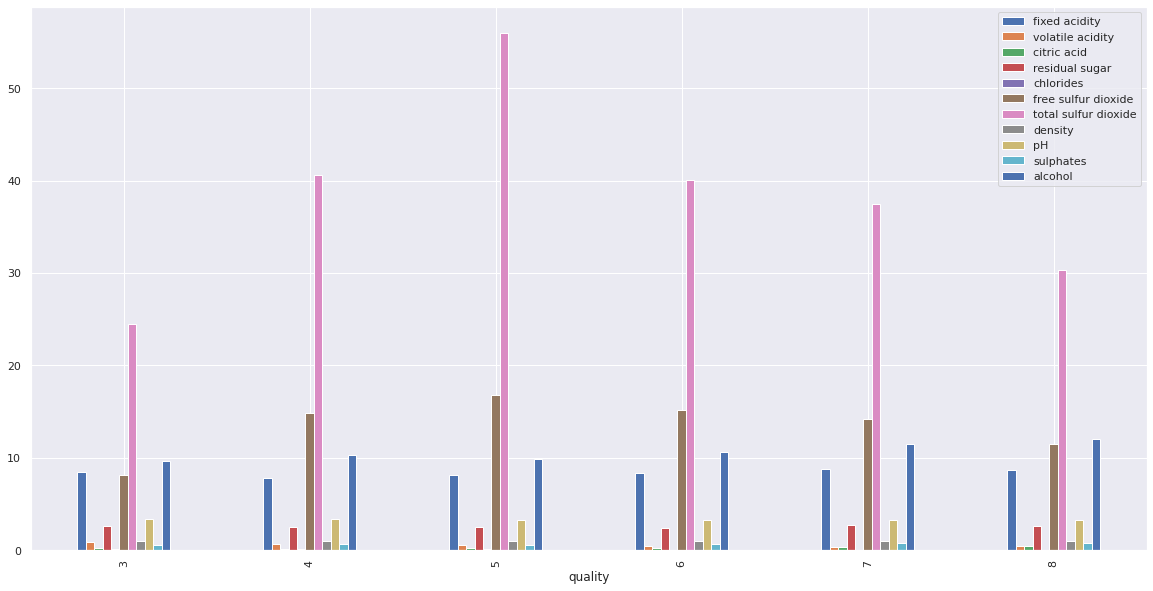

In [27]:
winefeatures.plot(kind="bar",figsize=(20,10))

#### **The distribution of various wine qualities in the target variable is shown in the graph below.**

In [28]:
fig = go.Figure(data=[go.Pie(labels=df['quality'].value_counts().index, values=df['quality'].value_counts(), hole=.3)])
fig.update_layout(legend_title_text='Quality')
fig.show()

Here I have used the Dataprep library whihc is useful in creating data analysis reports and it also has 3 functionalities for plotting graphs, plotting missing numbers, and correlations in the data.
* Below Graph tell us which columns are skewed
  1. **citric acid** is skewed
  2. **residual sugar** is skewed
  3. **chlorides** is skewed
  4. **sulphates** is skewed
* We have 11 continuous features and 1 categorical feature.
* We can also observe the distribution of each variable according to :
  1. frequency of data.
  2. giving us details about the quantiles
  3. IQR range
  4. Descriptive Statistics of column.
  5. 3 different types of graphs:
      1. **KDE plot** - It represents the probability distribution of the data values as the area under the plotted curve 
      2. **Normal Q-Q plot** - The Normal QQ Plot tool allows you to select the points that do not fall close to the reference line
      3. **Box plot** - They are built to provide high-level information at a glance, offering general information about a group of data's symmetry, skew, variance, and outliers.
* Interaction with different variable.
* Missing data plots

#### **Creating Analysis report using Dataprep**

In [64]:
create_report(df)

Output hidden; open in https://colab.research.google.com to view.

#### **The boxplot is plotted once more below to determine whether or not outliers should be removed.**

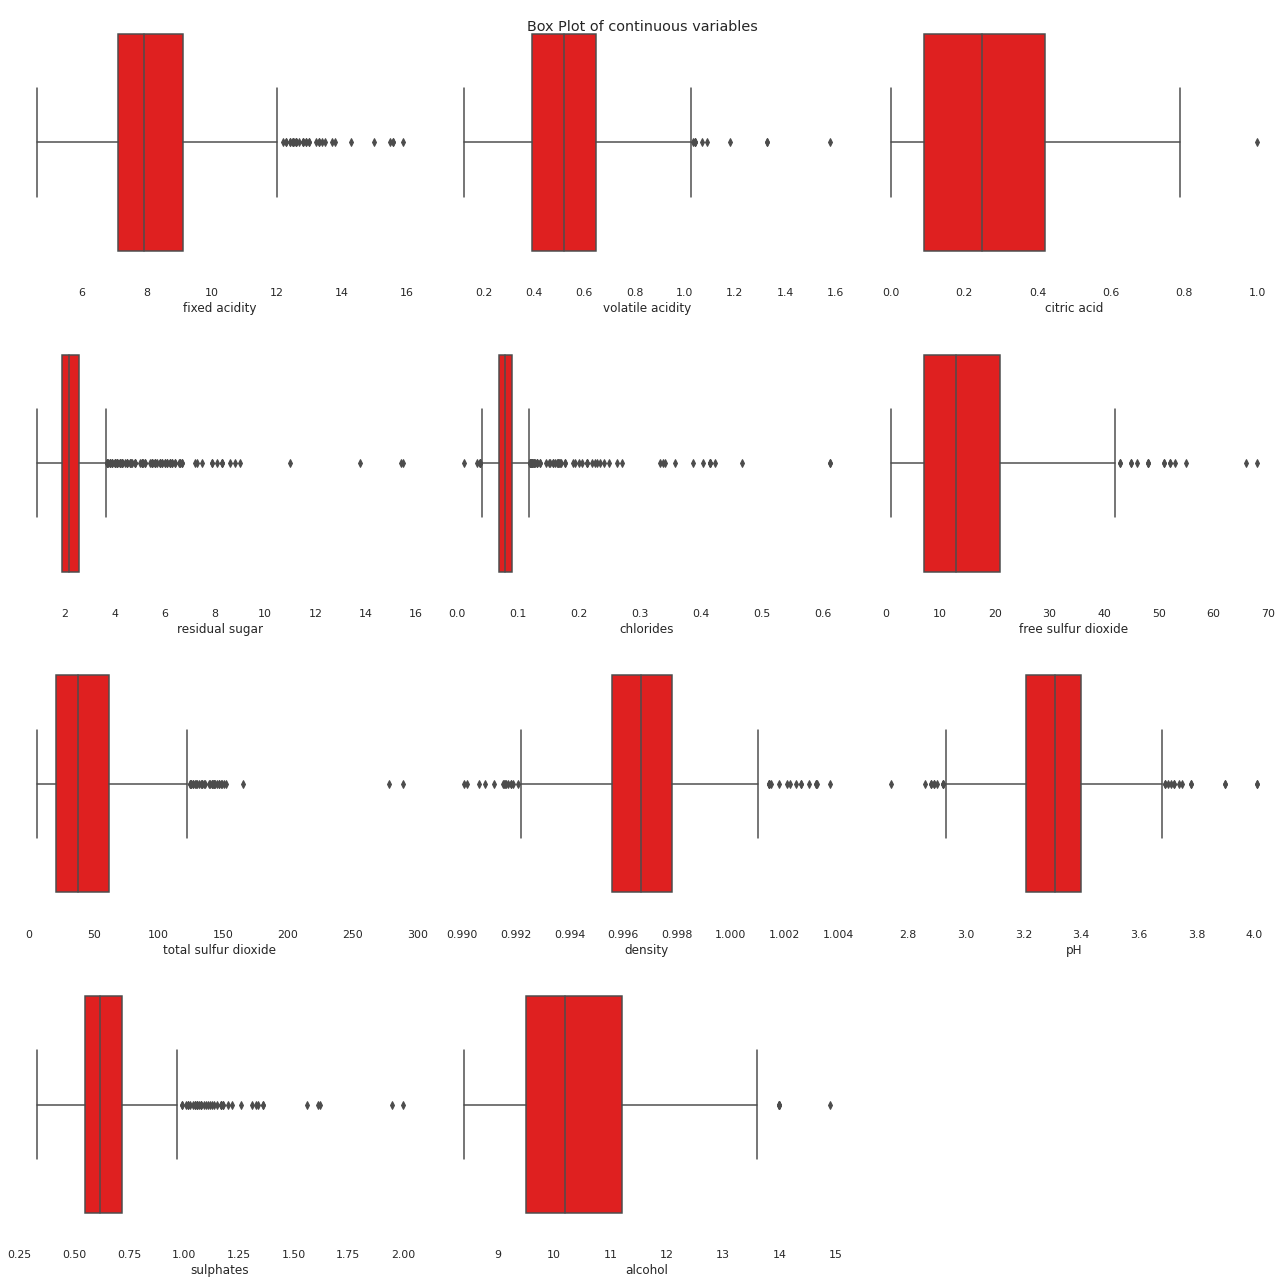

In [30]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(4,3, i+1)
    sns.boxplot(data=df, x=col, ax=ax,color='red')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

As can be seen from above box plots, the outliers which can be seen from above graphs, they are the real values and are not any noise or any error while making a datset.
For example:
* We can see many outliers in sulphates but permissible value of sulphates in wine are 210 mg/L. Therefore data we have is under the permissible limit.
* As medium sweet wines have up to 45 g/l of residual sugar we cannot remove any value as it is underlimit.
* It is difficult to identify any value as an outlier because different countries have different permissible limits for various constituents.
* Amount of residual sugar in wines start from 35g/L and our data contains till 15.5 which is under the permissible limit.
* As we dont know that our data is just about any particular category of wine we can remove any value as they are under the limit and dont have any extreme values.

**Therefore we are not treating outliers and keeping as it is which will help our analysis to be perfect and give good prediction.**

#### Data distribution of Continuous Variables

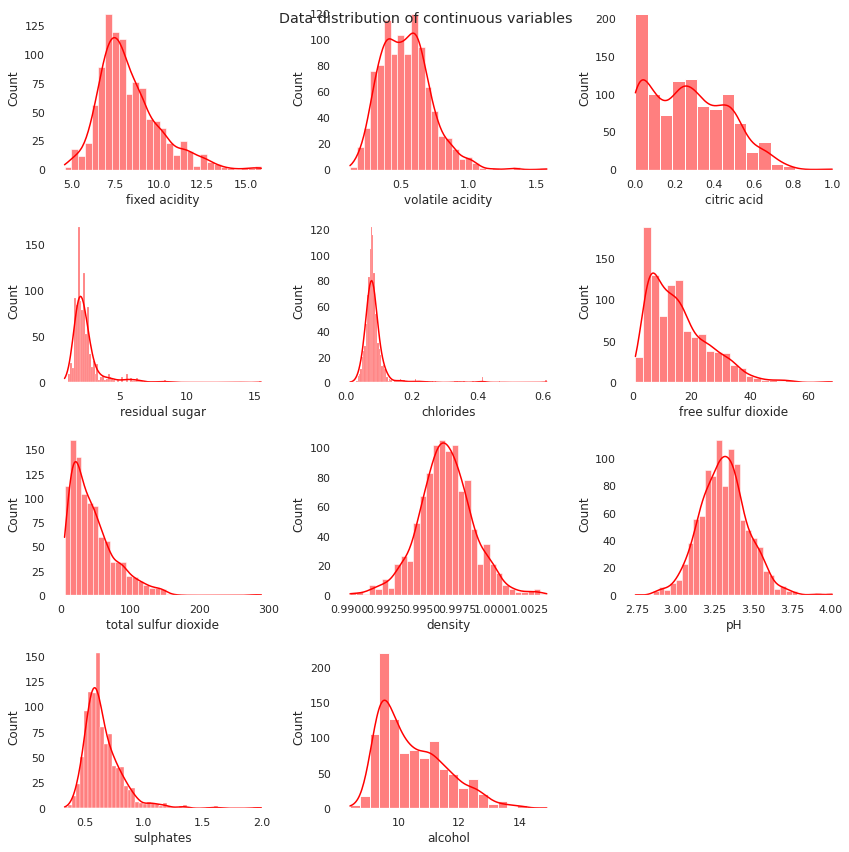

In [31]:
plt.figure(figsize=(12, 12))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(4,3, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

**Without handling the outliers, the above feature distribution produces good normal curves for our continuous variables, demonstrating the correctness of our decision.**

#### The distribution of wine quality in each wine feature is depicted in the graph below.

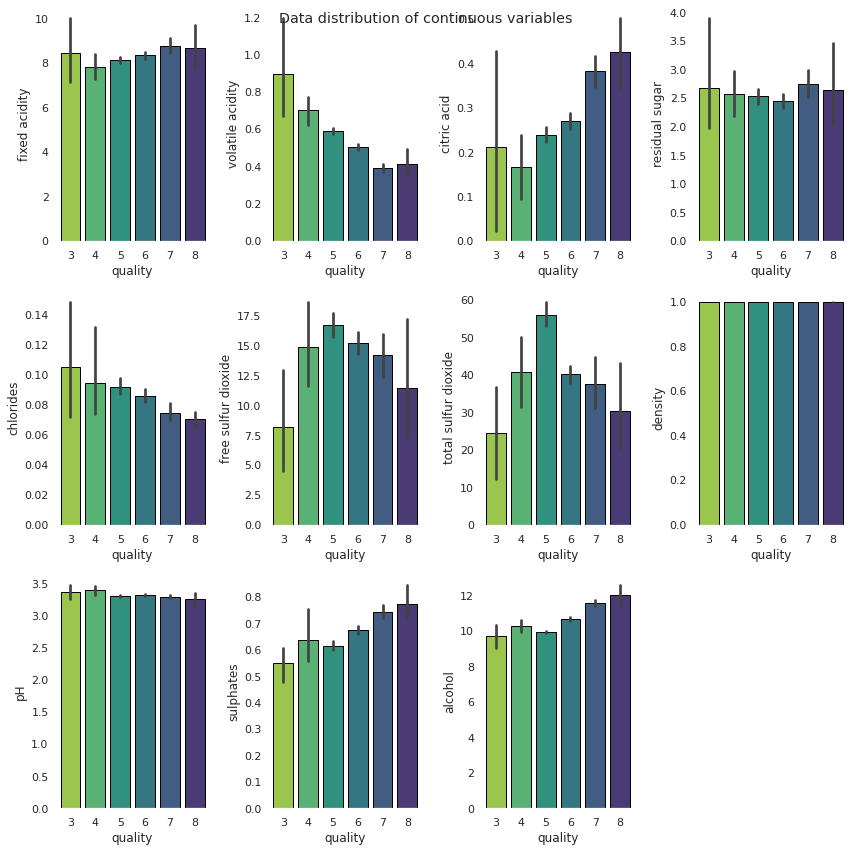

In [32]:
plt.figure(figsize=(12, 12))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(3,4, i+1)
    sns.barplot(data=df,x='quality', y=col, ax=ax,edgecolor="black",palette='viridis_r')
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

#### SMOTE

**The distribution of different wine qualities in our target variable is shown below, and it is very evident from this that there is a problem of class imbalance in our dataset. We should balance our target variable if we want to do our analysis accurately, since this will help our model work well on a balanced dataset and produce good predictions.**

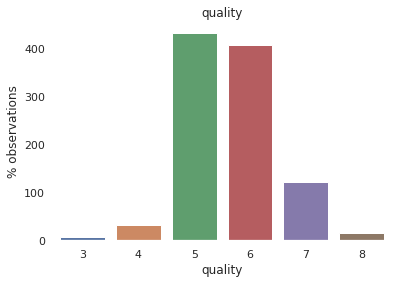

In [33]:
target_var=pd.crosstab(index=df['quality'],columns='% observations')
sns.barplot(x=target_var.index,y=target_var['% observations'])
plt.title('quality')
plt.show()

Taking all the independent feature in X variable and our target variable in Y variable.

In [34]:
X=df.iloc[:,0:-1]
Y=df.iloc[:,-1]

Oversampling the minority class is one way to deal with unbalanced datasets. Duplicating examples from the minority class is the simplest method, but these examples don't provide any new insight into the model. Instead, fresh examples can be created by synthesising the old ones. The **Synthetic Minority Oversampling Technique, or SMOTE**, is a method of data augmentation for the minority class.

In [35]:
sm=SMOTE()
X,Y=sm.fit_resample(X,Y)

**We can now undertake additional modelling because we can observe how our target variable now appears balanced after applying SMOTE.**

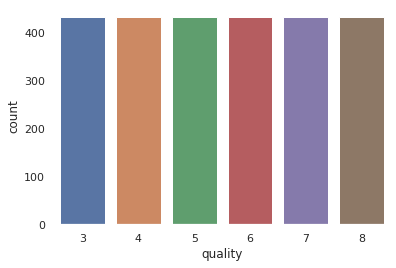

In [36]:
sns.countplot(Y)
plt.show()

**After applying SMOTE we can see our data has increased thoug it doesnt add any information and keeps the distribution same.**

In [37]:
print(X.shape)
print(Y.shape)

(2598, 11)
(2598,)


# Clustering


#### **PCA**


A statistical technique called principal component analysis, or PCA, enables you to more quickly and simply examine or analyse a smaller number of "summary indices" that represent the information content of massive data tables.

We have reduced our 12 variables down to 3 with mininmum information loss.

In [38]:
#Initiating PCA to reduce dimentions aka features to 3
df1 = df.copy()
pca = PCA(n_components=3)
pca.fit(df1)
PCA_ds = pd.DataFrame(pca.transform(df1), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T


,count,mean,std,min,25%,50%,75%,max
col1,1018.0,-3.126946e-15,33.838147,-42.091496,-25.971500,-8.458559,17.045523,241.884138
col2,1018.0,0.000000e+00,7.478623,-29.341204,-4.185160,-1.630713,3.250663,34.966956
col3,1018.0,-1.340120e-15,1.773621,-4.116859,-1.179825,-0.367020,0.887889,8.586535


Below is the projection of our complete dataset into 3d plot. WHich give us 3 clusters telling us that there are majorly 3 categories of wine. 

In [39]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
U =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot

fig = px.scatter_3d(PCA_ds, x=x, y=U, z=z, color="col1", opacity=0.9)
fig.show()

#### Method to find best number of cluster for our dataframe.

The initial value of the k clusters that we'll perform is used by KMeans. The procedure must be run for a variety of K values, the results must be compared, and the number of clusters must be determined. The best K value cannot be determined precisely, but using that method it can be predicted reasonably precisely:

The average distance between the data points and their centroid is one of the measures used to compare findings. We must utilise the mean distance to the centroid as a function of K and locate the "elbow point," when the rate of descent "sharpens," because the mean value will drop as we increase the amount of K.

Therefore, we are using Sklearn's K-Means function KElbowVisualizer().

Elbow Method to determine the number of clusters to be formed:


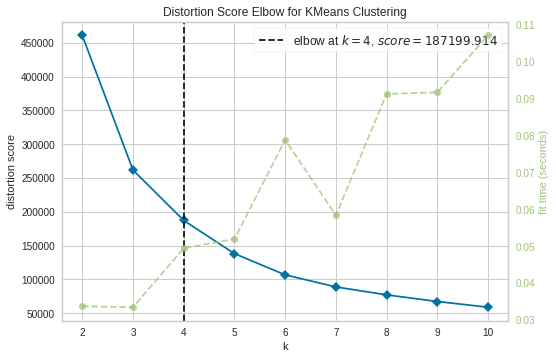

In [40]:
# Quick examination of elbow method to find numbers of clusters to make.
from yellowbrick.cluster import KElbowVisualizer

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_Method = KElbowVisualizer(KMeans(), K = range(1, 25))
Elbow_Method.fit(PCA_ds)
Elbow_Method.show()

From the above graph we can see the we have got the minimum distortion score at k = 4, whereas we have give the range for k from 1 to 25. Thereofre according to K elbow we our Dataframe has 4 cluster or we can **4 category of wines**.

Using the **Agglomerative Clustering model** we are fitting the model to our original dataset so that we can predict the clusters for future reference.

In [41]:
# Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)

# Fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC

# Adding the Clusters feature to the orignal dataframe.
df1["Clusters"]= yhat_AC

#### **Visualizing the 4 clusters according to our model.**

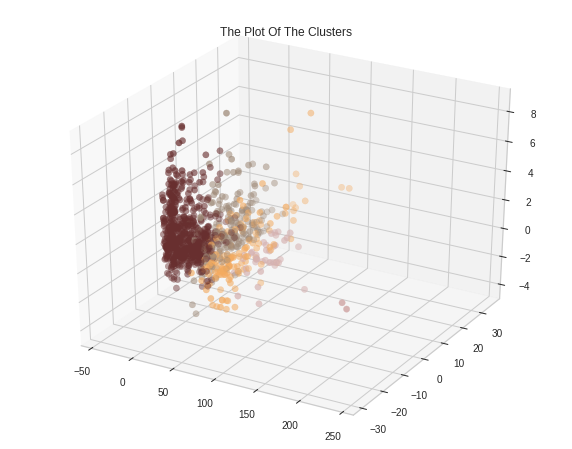

In [42]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))

ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, U, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

#### **Distribution of 4 Clusters can be seen below**

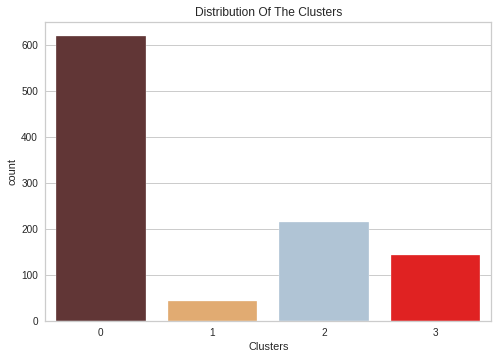

In [43]:
#Plotting countplot of clusters
pal = ["#682F2F","#F3AB60","#aac4db","#ff0303"]

pl = sns.countplot(x=df1["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

# Differnt Classification techniques

Mapping our target variable quality from 3,4,5,6,7,8 to 0,1,2,3,4,5 so that it will easy for us to get confusion matrix and perform classification.

In [44]:
Y = pd.DataFrame(Y)
Y['quality'] = Y['quality'].map({3:0,4:1,5:2,6:3,7:4,8:5})

### Splitting of Dataset

* In order to assess the accuracy of our model, we split our dataset into training and testing datasets. This allows us to determine which model performs the best on our dataset.
* The dataset has been distributed so that the distribution of our target variable is the same in the training and testing datasets and would not lead to a recurrence of the class imbalance problem.

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,stratify=Y,random_state=0)

**As we can see below the distribution of Target variable in our training and testing Dataset is exactly the same.**

In [46]:
dis = pd.concat([pd.DataFrame(y_train.describe()),pd.DataFrame(y_test.describe())],axis =1)
dis.set_axis(['Training Data', 'Testing Data'], axis='columns', inplace=True)
dis

,Training Data,Testing Data
count,1818.000000,780.000000
mean,2.500000,2.500000
std,1.708295,1.708921
min,0.000000,0.000000
25%,1.000000,1.000000
50%,2.500000,2.500000
75%,4.000000,4.000000
max,5.000000,5.000000


### Scaling

Before applying the Machine Learning models we should scale our data so that all variables should fall under normal curve which will make our model more robust for prediction. Scaling of the data makes it easy for a model to learn and understand the problem.

#### At first I have applied **Standard scaling**.

Standardization is a scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

In [47]:
from sklearn.preprocessing import StandardScaler
X_train1 = X_train.copy()
sc = StandardScaler() # creating an instance of the class object
df_new = pd.DataFrame(sc.fit_transform(X_train1), columns=X_train1.columns)  #fit and transforming StandardScaler the dataframe 

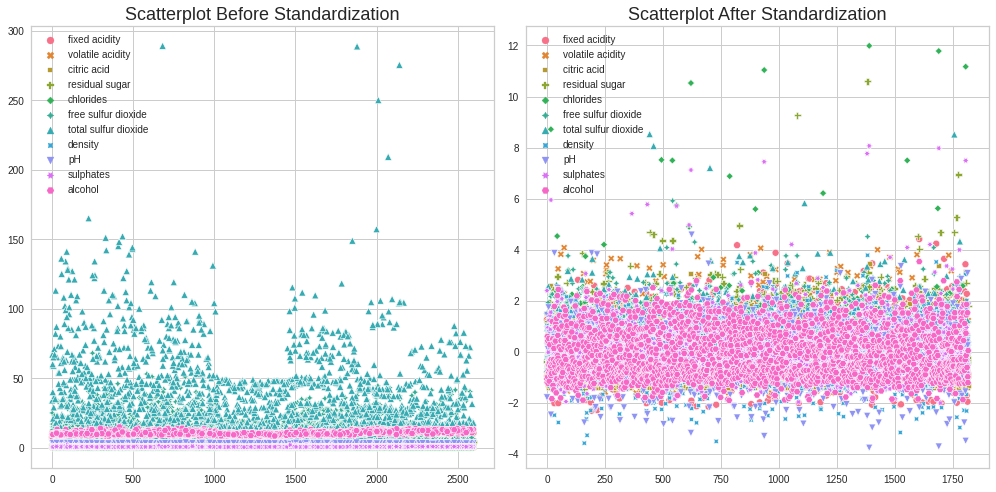

In [48]:
# plotting the scatterplot of before and after Standardization
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Scatterplot Before Standardization", fontsize=18)
sns.scatterplot(data = X_train1, color="blue")
plt.subplot(1,2,2)
plt.title("Scatterplot After Standardization", fontsize=18)
sns.scatterplot(data = df_new, color="red")
plt.tight_layout()
plt.show()

**Even after scaling all the variables, it is clear that the normal curves are not good. In order to make all the curves almost ideal normal curves, we should use another scaling strategy. Standard Scaling is also sensitive to outliers which can be the reason of this scaling method of not performing well.**

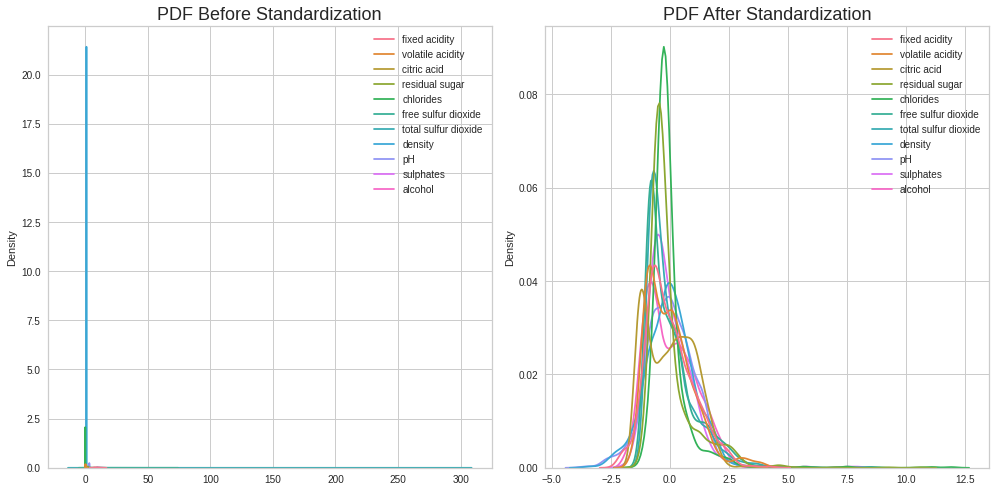

In [49]:
# plotting the scatterplot of before and after Standardization
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("PDF Before Standardization", fontsize=18)
sns.kdeplot(data = X_train1, color="blue")
plt.subplot(1,2,2)
plt.title("PDF After Standardization", fontsize=18)
sns.kdeplot(data = df_new, color="red")
plt.tight_layout()
plt.show()

#### Here we are performing **Robust Scaling** 

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).


In [50]:
# importing sklearn Min Max Scaler class which is for Robust scaling
from sklearn.preprocessing import RobustScaler

rs = RobustScaler() # creating an instance of the class object
df_new_train = pd.DataFrame(rs.fit_transform(X_train), columns=X_train.columns)  #fit and transforming Robust Scaling the dataframe 
df_new_test = pd.DataFrame(rs.fit_transform(X_test), columns=X_test.columns)

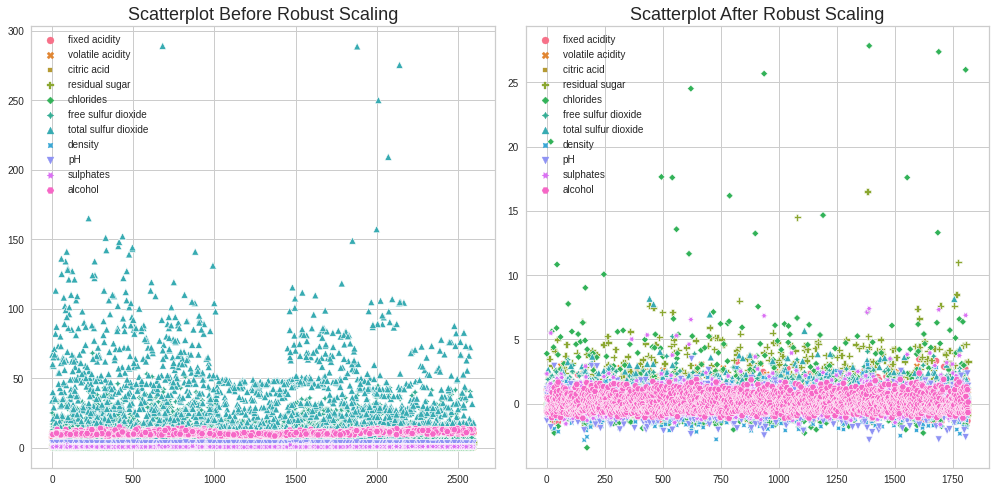

In [51]:
# plotting the scatterplot of before and after Robust Scaling
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("Scatterplot Before Robust Scaling", fontsize=18)
sns.scatterplot(data = X_train, color="blue")
plt.subplot(1,2,2)
plt.title("Scatterplot After Robust Scaling", fontsize=18)
sns.scatterplot(data = df_new_train, color="red")
plt.tight_layout()
plt.show()

**As it is well known, robust scaling is ideal for data with outliers. By examining the graph below, we can determine that it is operating effectively because all of the graphs show a good normal curve.**

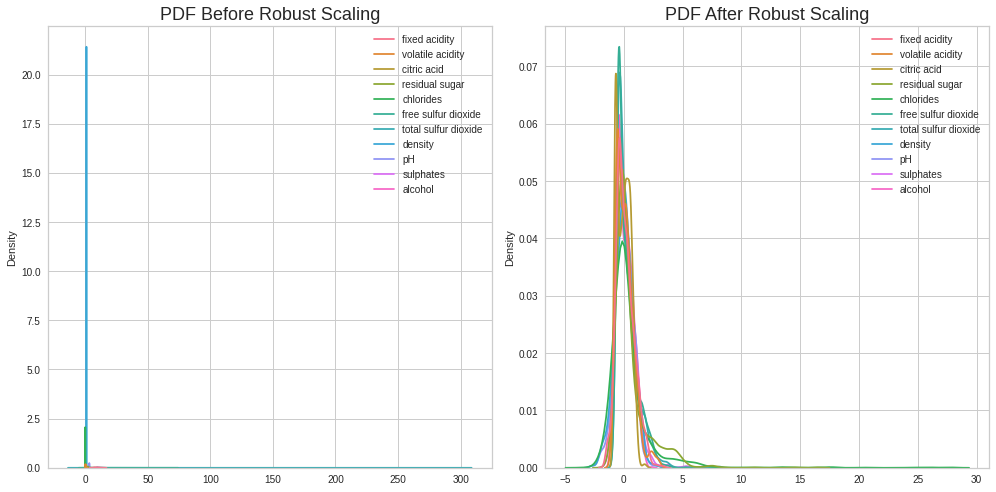

In [52]:
# plotting the scatterplot of before and after Robust Scaling
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.title("PDF Before Robust Scaling", fontsize=18)
sns.kdeplot(data = X_train, color="blue")
plt.subplot(1,2,2)
plt.title("PDF After Robust Scaling", fontsize=18)
sns.kdeplot(data = df_new_train, color="red")
plt.tight_layout()
plt.show()

Description of training data after scaling.

In [53]:
df_new_train.describe()[1:].T.style.background_gradient(cmap='Blues')

,mean,std,min,25%,50%,75%,max
fixed acidity,0.124761,0.754295,-1.615539,-0.418767,0.000000,0.581233,3.455459
volatile acidity,0.109520,0.734077,-1.134328,-0.477612,0.000000,0.522388,3.104478
citric acid,-0.009056,0.556071,-0.788912,-0.551468,-0.000000,0.448532,1.911066
residual sugar,0.567575,1.503150,-1.627352,-0.252352,0.000000,0.747648,16.497648
chlorides,0.472720,2.283919,-3.429729,-0.435367,0.000000,0.564633,27.843062
free sulfur dioxide,0.261087,0.839730,-0.831547,-0.384590,0.000000,0.615410,5.227585
total sulfur dioxide,0.292969,0.923364,-0.688449,-0.373448,0.000000,0.626552,8.167504
density,0.014700,0.796569,-2.831830,-0.502854,0.000000,0.497146,3.029876
pH,0.018970,0.756083,-2.818199,-0.483269,0.000000,0.516731,3.491081
sulphates,0.172926,0.894867,-1.618306,-0.399643,0.000000,0.600357,7.390263


### **ML Models**

Before starting with ML classification models we should familiarize ourself with some terminologies.
* **Precision** - It is the quality of a positive prediction made by the model. Precision refers to the number of true positives divided by the total number of positive predictions (i.e., the number of true positives plus the number of false positives)
* **Recall** - It helps us to measure how many positive samples were correctly classified by the ML model.The recall is calculated as the ratio between the number of Positive samples correctly classified as Positive to the total number of Positive samples
* **F1-score** - The F1 score is defined as the harmonic mean of precision and recall. As a short reminder, the harmonic mean is an alternative metric for the more common arithmetic mean. It is often useful when computing an average rate. In the F1 score, we compute the average of precision and recall
* **Accuracy** - Accuracy tells you how many times the ML model was correct overall
* **Cross-Validation** - Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. Use cross-validation to detect overfitting, ie, failing to generalize a pattern.


In [54]:
#creating dictionary for storing different models accuracy
model_comparison={}
X_train = df_new_train
X_test = df_new_test

#### **Decision Tree** - It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

Hyperparameters used below is max depth which tells us the length of the longest path from the tree root to a leaf.

We can see all the metrics printed below.

In [55]:
parameters = {'max_depth': [5,10,15,20]}
classifier=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf = GridSearchCV(classifier, parameters)
clf.fit(X_train,y_train)
print(f'Best Hyperparameters: {clf.best_params_}')
y_pred=clf.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Decision Tree']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Best Hyperparameters: {'max_depth': 15}
Model Accuracy : 71.92%
Model F1-Score : 72.25%
Cross Val Accuracy: 70.07 %
Cross Val Standard Deviation: 1.78 %
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       137
           1       0.84      0.80      0.82       136
           2       0.43      0.53      0.48       105
           3       0.48      0.43      0.46       145
           4       0.68      0.71      0.69       124
           5       0.91      0.89      0.90       133

    accuracy                           0.72       780
   macro avg       0.72      0.72      0.72       780
weighted avg       0.73      0.72      0.72       780



#### **K - Nearest Neigbours**

K-nearest neighbors (KNN) is a type of supervised learning algorithm used for both regression and classification. KNN tries to predict the correct class for the test data by calculating the distance between the test data and all the training points. Then select the K number of points which is closet to the test data.

We can see all the metrics printed below.

In [56]:
clf = KNeighborsClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['KNN']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 74.62%
Model F1-Score : 76.68%
Cross Val Accuracy: 70.07 %
Cross Val Standard Deviation: 1.78 %
              precision    recall  f1-score   support

           0       1.00      0.87      0.93       150
           1       0.95      0.76      0.84       164
           2       0.48      0.70      0.57        88
           3       0.35      0.50      0.41        90
           4       0.71      0.71      0.71       129
           5       0.99      0.81      0.89       159

    accuracy                           0.75       780
   macro avg       0.75      0.73      0.73       780
weighted avg       0.81      0.75      0.77       780



#### **Support Vector Classifier**

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data are transformed in such a way that the separator could be drawn as a hyperplane.

We can see all the metrics printed below.

In [57]:
parameters = {'C': [12,14,16,18,20], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
svc_model = SVC()
clf = GridSearchCV(svc_model, parameters)
clf.fit(X_train,y_train)
print(f'Best Hyperparameters: {clf.best_params_}')
y_pred=clf.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Support Vector Classifier']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Best Hyperparameters: {'C': 14, 'kernel': 'rbf'}
Model Accuracy : 78.59%
Model F1-Score : 79.30%
Cross Val Accuracy: 70.07 %
Cross Val Standard Deviation: 1.78 %
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       138
           1       0.92      0.82      0.87       146
           2       0.53      0.66      0.59       104
           3       0.54      0.54      0.54       129
           4       0.72      0.82      0.77       115
           5       1.00      0.88      0.94       148

    accuracy                           0.79       780
   macro avg       0.79      0.78      0.78       780
weighted avg       0.81      0.79      0.79       780



#### **Random Forest Classifier**

It's a classifier that combines a number of decision trees on different subsets of a dataset and averages the results to increase the dataset's predicted accuracy

We can see all the metrics printed below.

In [58]:
parameters = {'n_estimators': [160,180,200], 'max_depth':[18,20,22,24]}
classifier=RandomForestClassifier(criterion = 'entropy', random_state = 0)
clf = GridSearchCV(classifier, parameters)
clf.fit(X_train,y_train)
print(f'Best Hyperparameters: {clf.best_params_}')
y_pred=clf.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Random Forest']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Best Hyperparameters: {'max_depth': 20, 'n_estimators': 180}
Model Accuracy : 79.87%
Model F1-Score : 80.35%
Cross Val Accuracy: 80.14 %
Cross Val Standard Deviation: 2.44 %
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       134
           1       0.93      0.88      0.90       138
           2       0.57      0.69      0.62       108
           3       0.49      0.50      0.50       127
           4       0.81      0.77      0.79       136
           5       0.99      0.94      0.97       137

    accuracy                           0.80       780
   macro avg       0.80      0.79      0.79       780
weighted avg       0.81      0.80      0.80       780



#### Important features influencing target variable

In [59]:
forest_imp_features = clf.best_estimator_.feature_importances_
att = list(df)

forest_features1 = sorted(zip(forest_imp_features,att),reverse=True)
forest_features2b = pd.DataFrame(forest_features1,
                  columns = ['Forest Imp Features', 'Attributes with null values'])
forest_features2b

,Forest Imp Features,Attributes with null values
0,0.155537,volatile acidity
1,0.147887,sulphates
2,0.139225,alcohol
3,0.094781,total sulfur dioxide
4,0.086102,chlorides
5,0.084800,citric acid
6,0.063657,pH
7,0.063165,free sulfur dioxide
8,0.062508,density
9,0.054125,residual sugar


#### **Xg Boost**

XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It is a gradient boosting algorithm that uses decision trees as its “weak” predictors. Beyond that, its implementation was specifically engineered for optimal performance and speed.

We can see all the metrics printed below.

In [60]:
parameters = {'n_estimators': [100,125,150], 'max_depth':[8,10, 12]}
classifier = XGBClassifier()
clf = GridSearchCV(classifier, parameters)
clf.fit(X_train,y_train)
print(f'Best Hyperparameters: {clf.best_params_}')
y_pred=clf.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Xg Boost']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Best Hyperparameters: {'max_depth': 12, 'n_estimators': 150}
Model Accuracy : 79.87%
Model F1-Score : 80.38%
Cross Val Accuracy: 74.97 %
Cross Val Standard Deviation: 2.96 %
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       135
           1       0.93      0.86      0.90       140
           2       0.55      0.68      0.60       105
           3       0.51      0.51      0.51       130
           4       0.82      0.80      0.81       133
           5       0.99      0.94      0.97       137

    accuracy                           0.80       780
   macro avg       0.80      0.79      0.79       780
weighted avg       0.81      0.80      0.80       780



### Model Comparision

In [61]:
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['Model Accuracy','Model F1-Score','CV Accuracy','CV std']
Model_com_df=Model_com_df.sort_values(by='Model F1-Score',ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='Blues')

,Model Accuracy,Model F1-Score,CV Accuracy,CV std
Xg Boost,79.87%,80.38%,74.97%,2.96%
Random Forest,79.87%,80.35%,80.14%,2.44%
Support Vector Classifier,78.59%,79.30%,70.07%,1.78%
KNN,74.62%,76.68%,70.07%,1.78%
Decision Tree,71.92%,72.25%,70.07%,1.78%


In [62]:
fig = go.Figure(data=[
    go.Bar(name='F1 Score', y=Model_com_df.index, x=Model_com_df['Model F1-Score'], orientation='h'),
    go.Bar(name='Accuracy', y=Model_com_df.index, x=Model_com_df['Model Accuracy'], orientation='h')
])
fig.update_layout(barmode='group')
fig.show()

# Model Interpretation

As we can see Random Forest is our best performing model so we will choose **Random Forest to be our final model** for predicting the quality of wines.

**Advanatges of my model**
* It can handle large datasets efficiently.
* It reduces overfitting in decision trees and helps to improve the accuracy
* It is flexible to both classification and regression problems
* It works well with both categorical and continuous values
* It automates missing values present in the data
* Normalising of data is not required as it uses a rule-based approach.
* It also tells us the imprtant factors influencing target variable.

**Disadvanatges of my model**
* It requires much computational power as well as resources as it builds numerous trees to combine their outputs. 
* It also requires much time for training as it combines a lot of decision trees to determine the class.